Overarching description...

# 1. $f_c(z)$ Old vs. New

Short Description of the cross-check, hrefs to the relevant papers, pointers to the relevant plots

### Latest Attempt

In [76]:
runs = pickle.load(open('/Users/gregoryridgway/Desktop/spectral_distortions/data_dump/dataDist_elec_decay.dat', 'rb'))

In [77]:
import config

In [78]:
m_inc = .5
pri='elec'

if pri=='phot':
    log10m = np.arange(4.01, 12.76, m_inc)
else:
    log10m = np.arange(6.01, 12.76, m_inc)

    
decay_elec_CMB_raw = np.loadtxt(config.data_path+'/CMB_limits_elec_decay.csv', delimiter=',')
decay_elec_CMB = interp1d(np.transpose(decay_elec_CMB_raw)[0,:], np.transpose(decay_elec_CMB_raw)[1,:])

def tau_bound_elec_CMB(mDM):
    return np.array([decay_elec_CMB(mDM*1e-9)])[0]

In [252]:
log10eng0 = 3.6989700794219966
log10eng = np.array([log10eng0 + 0.23252559*i for i in np.arange(40)])
log10eng[-1] = 12.601505994846297

In [257]:
log10eng0 = 3.6989700794219966
log10eng = np.array([log10eng0 + 0.23252559*i for i in np.arange(40)])
log10eng[-1] = 12.601505994846297
mDM_list = 2*(10**log10eng + phys.me)

In [245]:
%autoreload

log10eng0 = 3.6989700794219966
log10eng = np.array([log10eng0 + 0.23252559*i for i in np.arange(40)])
log10eng[-1] = 12.601505994846297
mDM_list = 2*(10**log10eng + phys.me)

phys.me + injE
m_ind = 20 #33
# mDM = 10**runs[0][0][m_ind]
mDM = mDM_list[m_ind]
lifetime = 1e26
coarsen_factor = 16
sigmav = 3e-30
species = 'elec'
DM_process = 'decay'
string = str(int(np.floor(np.log10(mDM))))
start_rs = 3e3
end_rs = 500

output = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=lifetime, sigmav=sigmav,
    primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=coarsen_factor, backreaction=False, 
    recfast_TLA=True,
    distort=True, fudge=False,
    end_rs=end_rs
)

  0%|          | 0/400.0 [00:00<?, ?it/s]

/Users/gregoryridgway/Desktop/06_11_2021_Desktop/DM/DH/DarkHistory/examples/DH_Upgrade/../../darkhistory/spec/spectrum.py:861: RuntimeWarning: The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.
  warnings.warn("The new abscissa lies below the old one: only bins that lie within the new abscissa will be rebinned, bins above the abscissa will be discarded.", RuntimeWarning)
/Users/gregoryridgway/Desktop/06_11_2021_Desktop/DM/DH/DarkHistory/examples/DH_Upgrade/../../main.py:567: RuntimeWarning: invalid value encountered in log
  np.log(beta_MLA_data[:,1]),  fill_value='extrapolate'
/Users/gregoryridgway/Desktop/06_11_2021_Desktop/DM/DH/DarkHistory/examples/DH_Upgrade/../../darkhistory/low_energy/atomic.py:466: RuntimeWarning: overflow encountered in true_divide
  K[nl,states_l == l+1] = BB['dn'][l+2:,n,l+1]/tot_rate
/Users/gregoryridgway/Desktop/06_11_2021_Desktop/DM/DH/DarkHistory/examples/DH_Upg

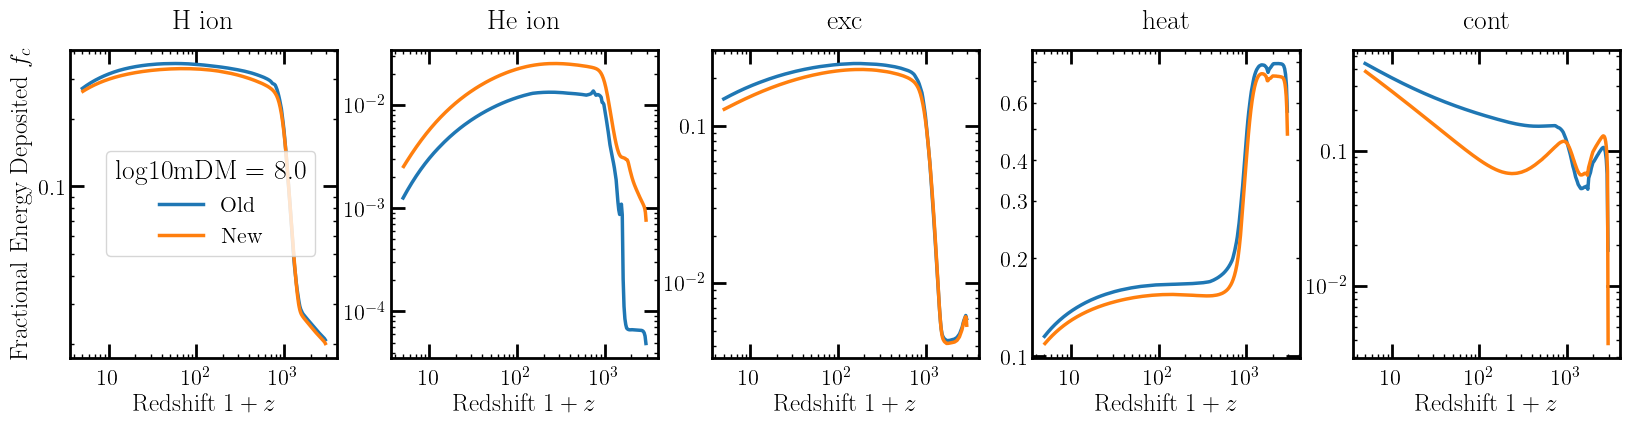

In [247]:
rs_plot = output['rs'][1:]
# rs_plot = runs[1][m_ind]['rs'][1:]
mDM = 10**runs[0][0][m_ind]
# lifetime = tau_bound_elec_CMB(mDM)

f_cont_input = np.squeeze(output['lowengphot'].toteng('eng', np.array([1e-12,10.2])))[1:]
# f_cont_input = np.squeeze(runs[1][m_ind]['lowengphot'].toteng('eng', np.array([1e-12,10.2])))[1:]
f_cont = interp1d(
    rs_plot, f_cont_input * phys.nB * rs_plot**3 / (
    .001*coarsen_factor / phys.hubble(rs_plot)) / phys.inj_rate(
    'decay', rs_plot, mDM, lifetime=lifetime)
)

fig, axarr = plt.subplots(1,5, figsize=(4*5,4))

ch_std = ['H ion', 'He ion', 'exc', 'heat', 'cont']
ch_run = ['H ion', 'He ion', 'Lya', 'heat', 'err']

for i in np.arange(5):
    axarr[i].loglog()
    axarr[i].set_xlabel(r'Redshift $1+z$')
    axarr[i].set_title(ch_std[i], fontsize=20)

    rs_tmp = 10**np.arange(np.log10(5), np.log10(3e3), .01)
    axarr[i].plot(
        rs_tmp, phys.f_std(mDM, rs_tmp, species, DM_process, channel=ch_std[i]), label='Old'
    )

    if i==0:
        axarr[i].plot(rs_plot, output['f'][ch_run[i]][1:], label='New')
        # axarr[i].plot(rs_plot, runs[1][m_ind]['f'][ch_run[i]][1:], label='New')
    elif i==4:
        axarr[i].plot(rs_plot, f_cont(rs_plot))
    else:
        axarr[i].plot(rs_plot, output['f'][ch_run[i]][1:])
        # axarr[i].plot(rs_plot, runs[1][m_ind]['f'][ch_run[i]][1:])

axarr[0].set_ylabel(r'Fractional Energy Deposited $f_c$')
axarr[0].legend(title='log10mDM = '+"{:.1f}".format(np.log10(mDM)))

# 2. $f_c(z)$ vs. MEDEA

Short Description of the cross-check, hrefs to the relevant papers, pointers to the relevant plots

In [22]:
import darkhistory.electrons.elec_cooling as elec_cooling
from config import load_data
from   darkhistory.spec.spectools import EnglossRebinData
from darkhistory.electrons.elec_cooling import get_elec_cooling_tf

In [27]:
import darkhistory.spec.spectrum as spectrum
import scipy.integrate as integrate 
import darkhistory.spec.spectools as spectools
import darkhistory.low_energy.lowE_electrons as lowE_elec
import darkhistory.utilities as utils
import main

In [29]:
# Load data.
binning = load_data('binning')
photeng = binning['phot']
eleceng = binning['elec']

dep_tf_data = load_data('dep_tf')

ics_tf_data = load_data('ics_tf')

ics_thomson_ref_tf  = ics_tf_data['thomson']
ics_rel_ref_tf      = ics_tf_data['rel']
engloss_ref_tf      = ics_tf_data['engloss']

spec_2s1s = main.generate_spec_2s1s(photeng)

#MEDEA
H_states = ['2s', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p', '10p']

(
    coll_ion_sec_elec_specs, coll_exc_sec_elec_specs,
    ics_engloss_data
) = main.get_elec_cooling_data(eleceng, photeng, H_states=H_states)

In [30]:
#Probs that a given state decays ultimately to '2p'
Ps = {'2p': 1.0000, '2s': 0.0, '3p': 0.0,
      '4p': 0.2609,'5p': 0.3078,'6p': 0.3259,
      '7p': 0.3353,'8p': 0.3410,'9p': 0.3448,'10p': 0.3476}

#ionization levels probed by MEDEA
xes = np.array([
    1e-4, 1.5e-4, 2e-4, 3e-4, 5e-4,
    1e-3, 1.5e-3, 2e-3, 3e-3, 5e-3,
    1e-2, 1.5e-2, 2e-2, 3e-2, 5e-2,
    1e-1, 1.5e-1, 2e-1, 3e-1, 5e-1,
    7e-1, 8e-1, 9e-1, 9.5e-1, 9.9e-1, 
    1.0
])

channels = ['heat', 'exc', 'H ion', 'He ion', 'cont']
fs = {chan: np.zeros((xes.size, eleceng.size)) for chan in channels}

In [36]:
rs=1
for i,xHII in enumerate(tqdm(xes)):
    (
        ics_sec_phot_tf,
        deposited_ion_arr, deposited_exc_arr, deposited_heat_arr,
        deposited_ICS_arr, ICS_err_arr
    ) = get_elec_cooling_tf(
            eleceng, photeng, rs,
            xHII, xHeII=xHII * phys.chi,
            raw_thomson_tf=ics_thomson_ref_tf,
            raw_rel_tf=ics_rel_ref_tf,
            raw_engloss_tf=engloss_ref_tf,
            coll_ion_sec_elec_specs=None,
            coll_exc_sec_elec_specs=None,
            ics_engloss_data=ics_engloss_data, 
            spec_2s1s = spec_2s1s, H_states=H_states
        )

    fs['heat'][i]   = deposited_heat_arr/eleceng
    fs['H ion'][i]  = deposited_ion_arr['H']/eleceng
    fs['He ion'][i] = deposited_ion_arr['He']/eleceng
    
    fs['exc'][i]  = np.sum([
        deposited_exc_arr[species]*Ps[species] * phys.lya_eng/phys.H_exc_eng(species)
    for species in Ps], axis=0)/eleceng

    fs['cont'][i] = np.sum([
        deposited_exc_arr[species]*(1-Ps[species]) * (1+1-phys.lya_eng/phys.H_exc_eng(species))
    for species in Ps], axis=0)/eleceng + (
    deposited_ICS_arr/eleceng)

/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_13661/633125279.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,xHII in enumerate(tqdm(xes)):


  0%|          | 0/26 [00:00<?, ?it/s]

In [37]:
our_fs = np.array([fs[chan] for chan in channels])
our_fs = our_fs.swapaxes(0,2)
our_fs = our_fs.swapaxes(0,1)

MEDEA_interp = lowE_elec.make_interpolator()
DH_interp = utils.Interpolator2D(
    xes, 'xes', eleceng, 'engs', our_fs, logInterp=True
)

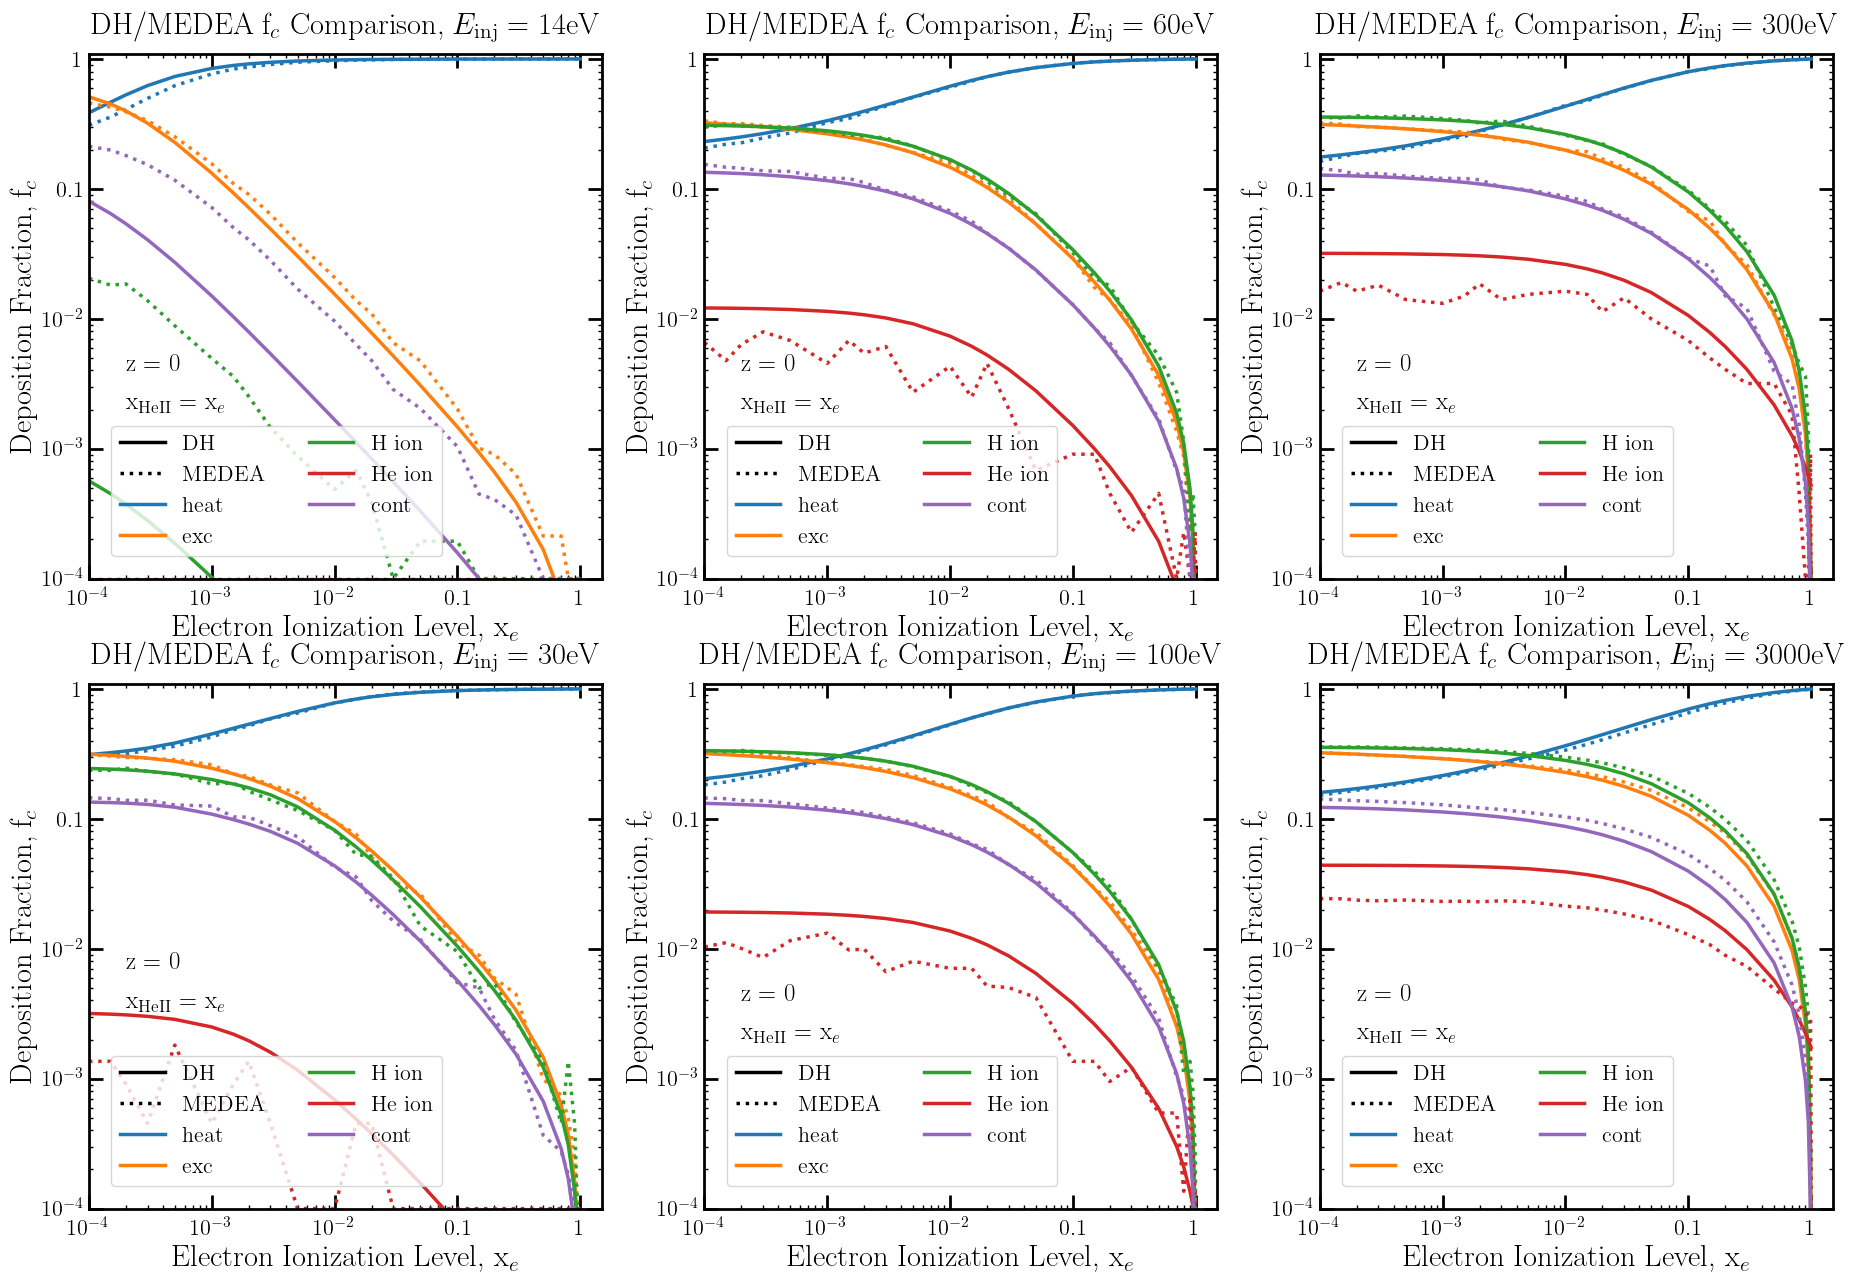

In [39]:
initEs = np.array([14, 30, 60, 100, 300, 3000])
fig, axarr = plt.subplots(2, int(initEs.size/2), figsize=(7.5*initEs.size/2,2*7.5))
for i, initE in enumerate(initEs):
    j = int(i%2)
    k = int(np.floor(i/2))
    DH_data = DH_interp.get_vals(xes,initE)
    MEDEA_data = MEDEA_interp.get_vals(xes,initE)

    axarr[j][k].loglog()
    axarr[j][k].plot(xes, np.ones_like(xes)*1e-20, color='k', label='DH')
    axarr[j][k].plot(xes, np.ones_like(xes)*1e-20, color='k', linestyle=':', label='MEDEA')

    for j1 in np.arange(5):
        axarr[j][k].plot(xes, DH_data[:,j1], color='C'+str(j1), label=channels[j1])
        axarr[j][k].plot(xes, MEDEA_data[:,j1], color='C'+str(j1), linestyle=':')

    axarr[j][k].axis([1e-4, 1.5, 1e-4,1.1])
    axarr[j][k].set_title(r'DH/MEDEA f$_c$ Comparison, $E_{\mathrm{inj}} = '+str(initE)+'$eV', fontsize=22)
    axarr[j][k].set_xlabel(r'Electron Ionization Level, x$_e$', fontsize=22)
    axarr[j][k].set_ylabel(r'Deposition Fraction, f$_c$', fontsize=22)
    if i!=1:
        leg_y = 4e-3
    else:
        leg_y = 7e-3
    axarr[j][k].text(2e-4, leg_y, r'z = '+str(rs-1), fontsize = 18)
    axarr[j][k].text(2e-4, leg_y/2, r'x$_{\mathrm{HeII}}$ = x$_e$', fontsize = 18)
    axarr[j][k].legend(ncol=2, loc=3)
    
# plt.savefig('/Users/gregoryridgway/Dropbox (MIT)/DarkHistory_V2/data/MEDEA_CrossCheck.pdf')

# 3. $f_c(z)$ vs. Acharya+Khatri

Short Description of the cross-check, hrefs to the relevant papers, pointers to the relevant plots

In [41]:
from scipy.interpolate import interp1d

In [42]:
import csv
files = ['heat', 'ICS', 'He ion', 'H ion', 'H exc2', 'H exc3', 'He exc']
Acharya_f = {'04': {}, '0002': {}}
for num in ['04', '0002']:
    for f in files:
        Acharya_f[num][f] = []
        with open('/Users/gregoryridgway/Desktop/Webplot Digitizer/Distortions/'
                  +'Acharya'+num+'/'+f+'.csv') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                Acharya_f[num][f].append([float(row[0]),float(row[1])])
        Acharya_f[num][f] = np.array(Acharya_f[num][f])
        Acharya_f[num][f] = interp1d(Acharya_f[num][f][:,0], Acharya_f[num][f][:,1],
                                    bounds_error=False, fill_value=(1e-10,1e-10))

In [45]:
eleceng, photeng = binning['elec'], binning['phot']
H_states  = ['2s', '2p', '3p']

spec_2s1s = main.generate_spec_2s1s(photeng)
(
    coll_ion_sec_elec_specs, coll_exc_sec_elec_specs, ics_engloss_data
) = main.get_elec_cooling_data(eleceng, photeng, H_states=H_states)

simple_ICS = True
DH_f = {'04': {}, '0002': {}}
for i, num in enumerate(['04', '0002']):
    if num == '04':
        xHII = 4e-2
        rs = 1001
    else:
        xHII = 2e-4
        rs=101
        
    (
        ics_sec_phot_tf,
        deposited_ion_arr, deposited_exc_arr, deposited_heat_arr,
        deposited_ICS_arr, ICS_err_vec
    ) = get_elec_cooling_tf(
            eleceng, photeng, rs,
            xHII, xHeII=0,
            raw_thomson_tf=ics_thomson_ref_tf,
            raw_rel_tf=ics_rel_ref_tf,
            raw_engloss_tf=engloss_ref_tf,
            coll_ion_sec_elec_specs=None,
            coll_exc_sec_elec_specs=None,
            ics_engloss_data=ics_engloss_data, 
            #loweng=eleceng[0], 
            spec_2s1s = spec_2s1s,
            simple_ICS=simple_ICS,
            check_conservation_eng=False,
            H_states=H_states
    )
    
    DH_f[num]['heat'] = deposited_heat_arr/eleceng
#     if simple_ICS:
    DH_f[num]['ICS'] = deposited_ICS_arr/eleceng #(np.dot(ics_sec_phot_tf.grid_vals, photeng)-0*deposited_ICS_arr)/eleceng
#     else:
#         DH_f[num]['ICS']= np.dot(ics_sec_phot_tf.grid_vals, photeng)/eleceng
    DH_f[num]['He ion'] = deposited_ion_arr['He']/eleceng
    DH_f[num]['H ion']  = deposited_ion_arr['H']/eleceng
    DH_f[num]['H exc2'] = (deposited_exc_arr['2s']+deposited_exc_arr['2p'])/eleceng
    DH_f[num]['H exc3'] = deposited_exc_arr['3p']/eleceng
    DH_f[num]['He exc'] = (deposited_exc_arr['HeI']+deposited_exc_arr['HeII'])/eleceng

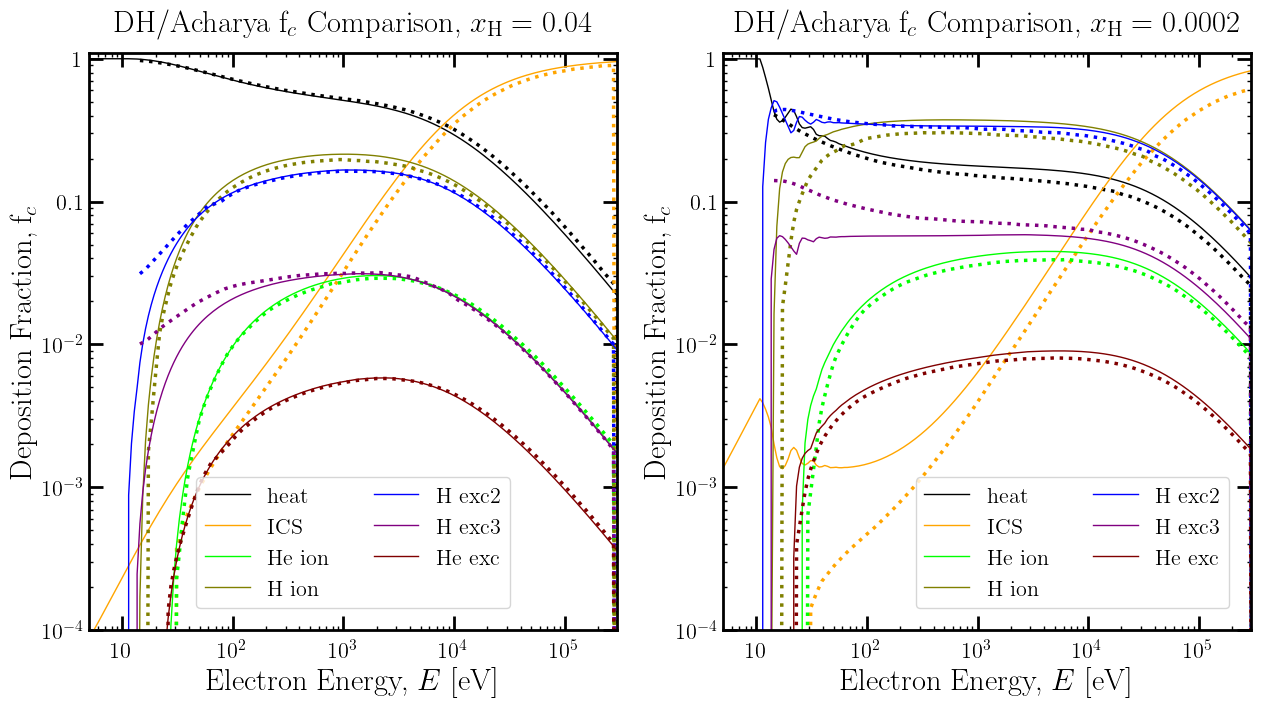

In [46]:
#!!! Remember how oscillations are related to excitation thresholds
#!!! Remember why ICS shoots up at 10eV in left plot
initEs = np.array([14, 30, 60, 100, 300, 3000])
fig, axarr = plt.subplots(1, 2, figsize=(15,7.5))
colors = {'heat':'k', 
              'ICS': 'orange', 
              'He ion': 'lime', 
              'H ion': 'olive', 
              'H exc2': 'blue', 
              'H exc3': 'purple', 
              'He exc': 'maroon'}
for i, num in enumerate(['04', '0002']):
    axarr[i].loglog()
    for f in files:
        ind = sum(eleceng<14)
        axarr[i].plot(eleceng[ind:], Acharya_f[num][f](eleceng[ind:]),
                      color=colors[f], linestyle=':')
        axarr[i].plot(eleceng, DH_f[num][f], 
                      color=colors[f], linestyle='solid', linewidth=1, label=f)

    axarr[i].axis([5, 3e5, 1e-4,1.1])
    axarr[i].set_title(r'DH/Acharya f$_c$ Comparison, $x_{\mathrm{H}} = 0.$'+str(num), fontsize=22)
    axarr[i].set_xlabel(r'Electron Energy, $E$ [eV]', fontsize=22)
    axarr[i].set_ylabel(r'Deposition Fraction, f$_c$', fontsize=22)
    axarr[i].legend(ncol=2)

# 4. $x_e(z)$ vs. Hyrec

Short Description of the cross-check, hrefs to the relevant papers, pointers to the relevant plots

In [48]:
import csv

with open('/Users/gregoryridgway/Desktop/Webplot Digitizer/DHv2/EMLA.csv') as csvfile:
    reader = csv.reader(csvfile)
    EMLA_data = []
    for row in reader:
        EMLA_data.append([float(r) for r in row])
        
    EMLA_data = np.array(EMLA_data)
    
with open('/Users/gregoryridgway/Desktop/Webplot Digitizer/DHv2/Recfast.csv') as csvfile:
    reader = csv.reader(csvfile)
    Rec_data = []
    for row in reader:
        Rec_data.append([float(r) for r in row])
        
    Rec_data = np.array(Rec_data)

In [49]:
%autoreload
mDM = 3e10
# sigmav = xsec_bound_elec_CMB(mDM,'swave')
lifetime=1e50
species = 'phot'
DM_process = 'decay'
string = str(int(np.floor(np.log10(mDM))))
start_rs = 3e3
end_rs = 200

baseline = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=lifetime,
    primary=species+'_delta',
    start_rs = 3e3,
    coarsen_factor=16, backreaction=False, 
    distort=False, fudge=False,
    end_rs=end_rs
)

fudge = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=lifetime,
    primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=16, backreaction=False, 
    distort=False, fudge=True,
    end_rs=end_rs
)

  0%|          | 0/170.0 [00:00<?, ?it/s]

  0%|          | 0/170.0 [00:00<?, ?it/s]

In [57]:
MLA_data = pickle.load(open('/Users/gregoryridgway/Dropbox (MIT)/Darkhistory_V2/data/MLA_rates_nmax100_dlnz1e-03_endrs200.dat','rb'))
MLA_funcs = np.array([
    interp1d(MLA_data[0], MLA_data[1]),
    interp1d(np.log(MLA_data[0]), np.log(MLA_data[1]))
])

/var/folders/kq/gkzlnb6576x8mxsf32v72_y00000gn/T/ipykernel_13661/3226686956.py:4: RuntimeWarning: divide by zero encountered in log
  interp1d(np.log(MLA_data[0]), np.log(MLA_data[1]))


In [58]:
# MLA_funcs = pickle.load(open('/Users/gregoryridgway/Desktop/Data/MLA_funcs_100.p','rb'))
nmax=10
start_rs=3e3
end_rs = 200

perturbed = main.evolve(
    DM_process=DM_process, mDM=mDM,
    lifetime=lifetime,
    primary=species+'_delta',
    start_rs = start_rs,
    coarsen_factor=1, backreaction=False, 
    distort=False, fudge=True, recfast_TLA=False,
    end_rs=end_rs, nmax=nmax,
    MLA_funcs=MLA_funcs,
    rtol=1e-6
)

  0%|          | 0/2709.0 [00:00<?, ?it/s]

TypeError: 'NoneType' object is not callable

In [51]:
hyrec100 = pickle.load(open('/Users/gregoryridgway/Dropbox (MIT)/DarkHistory_V2/data/hyrec100.p','rb'))

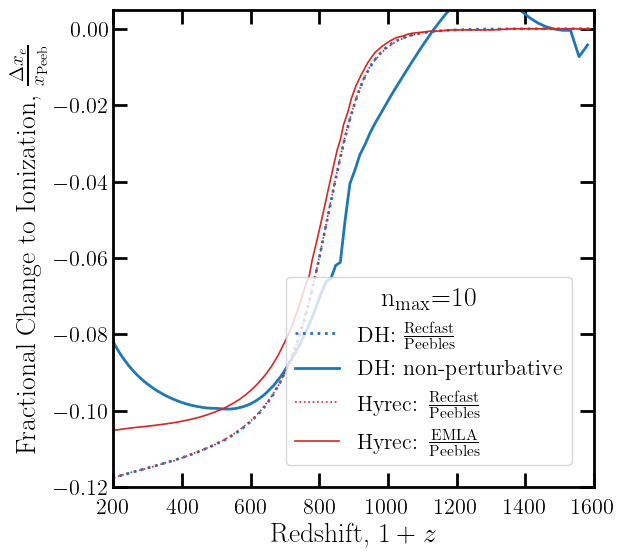

In [55]:
plt.figure()
plt.axis([200,1600, -.12,.005])
plt.plot(fudge['rs'], fudge['x'][:,0]/baseline['x'][:,0]-1, 
         color='C0', linestyle=':', linewidth = 2.0, 
         label=r'DH: $\frac{\mathrm{Recfast}}{\mathrm{Peebles}}$')

mask = baseline['rs']<1600
stuff = interp1d(hyrec100['rs'],hyrec100['x'][:,0])(baseline['rs'][mask])
plt.plot(baseline['rs'][mask], stuff/baseline['x'][mask,0]-1, 
         color='C0', linestyle='solid', linewidth = 2.0, 
         label=r'DH: non-perturbative')

mask = baseline['rs']<1600
perturbed_stuff = interp1d(perturbed['rs'], perturbed['x'][:,0])(baseline['rs'][mask])
plt.plot(baseline['rs'][mask], perturbed_stuff/baseline['x'][mask,0]-1, 
         color='C2', linestyle='solid', linewidth = 2.0, 
         label=r'DH: perturbative')

if False:
    plt.plot(hyrec_test10['rs'], hyrec_test10['x'][:,0]/baseline['x'][:,0]-1, 
            label=r'DH: $\frac{\mathrm{EMLA}}{\mathrm{Peebles}}$, $n_{max}=10$')
    plt.plot(hyrec_test20['rs'], hyrec_test20['x'][:,0]/baseline['x'][:,0]-1, 
            label=r'$n_{max}=20$', linestyle=':')
    # plt.plot(hyrec_testfine['rs'], hyrec_testfine['x'][:,0]/baseline['x'][:,0]-1, 
    #          label=r'fine interp', linestyle=':')
    plt.plot(hyrec50['rs'], hyrec50['x'][:,0]/baseline['x'][:,0]-1, 
            label=r'$n_{max}=50$', linestyle=':')
    plt.plot(hyrec100['rs'], hyrec100['x'][:,0]/baseline['x'][:,0]-1, 
            label=r'$n_{max}=100$', linestyle=':')
    # plt.plot(hyrec10_principled['rs'], hyrec10_principled['x'][:,0]/baseline['x'][:,0]-1, 
    #          label=r'$n_{max}=50$', linestyle=':')

lw = 1.2
plt.plot(Rec_data[:,0], Rec_data[:,1], color='C3', 
         linewidth = lw, linestyle = ':', 
         label=r'Hyrec: $\frac{\mathrm{Recfast}}{\mathrm{Peebles}}$')
plt.plot(EMLA_data[:,0], EMLA_data[:,1], color='C3', 
         linewidth = lw, linestyle = 'solid', 
         label=r'Hyrec: $\frac{\mathrm{EMLA}}{\mathrm{Peebles}}$')

plt.xlabel(r'Redshift, $1+z$', fontsize=20)
plt.ylabel(r'Fractional Change to Ionization, $\frac{\Delta x_e}{x_{\mathrm{Peeb}}}$', fontsize=20)
# plt.ylabel(r'Occupation Number', fontsize=20)
plt.legend(title=r'$\mathrm{n_{max}}$='+str(nmax))

# plt.title(r'Testing the TLA Assumptions')

# 5. `distortion` vs. Jens+Sunyaev

Short Description of the cross-check, hrefs to the relevant papers, pointers to the relevant plots

- BB only, nmax = 10,20,30, no 2s
- BB only, with 2s
- BB + BF + 2s

In [9]:
import csv
import pickle
import sys
sys.path.append('../..')
import darkhistory
import darkhistory.physics as phys

In [3]:
def download_plot(file):
    with open('/Users/gregoryridgway/Desktop/Webplot_distortion/'+file+'.csv') as csvfile:
        reader = csv.reader(csvfile)
        goods = []
        for row in reader:
            goods.append([float(r) for r in row])
            
        goods = np.array(goods)

    return goods

n10_data = download_plot('n10')
n20_data = download_plot('n20')
n30_data = download_plot('n30')
jens_data = download_plot('Full_Distortion')
jens_2s = download_plot('DeltaR_2s_jens')
jens_2p = download_plot('DeltaR_2p_jens')
BB_BF_jens = download_plot('BB_plus_BF_dist')

In [13]:
load = True

if load:
    tmp = pickle.load(open('/Users/gregoryridgway/Dropbox (MIT)/DarkHistory_V2/data/distortion100.p','rb'))
    eng = tmp.eng
else:
    print('BAD')

Text(0, 0.5, 'Intensity, $I_{\\nu}$ [J s$^{-1}$ m$^{-2}$ Hz$^{-1}$ sr$^{-1}$]')

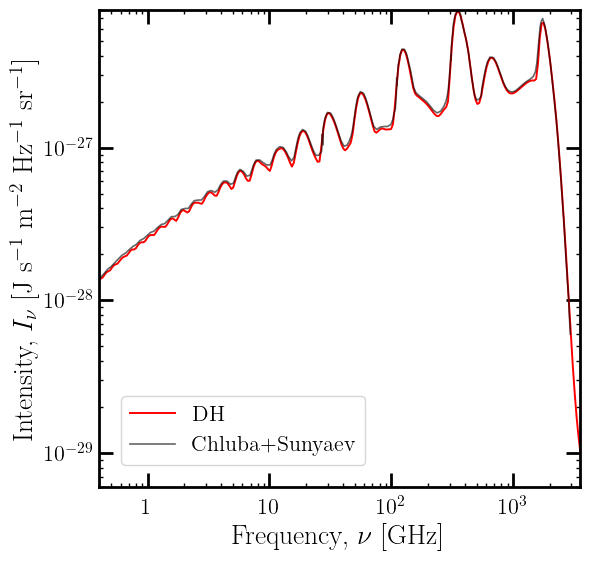

In [19]:
hplanck = phys.hbar * 2*np.pi
convert = phys.nB * eng * hplanck * phys.c /(4*np.pi) * phys.ele * 1e4
nu = eng/hplanck
rs_fac = 1300


plt.figure()
# plt.xscale('log')
plt.loglog()
# plt.axis([1e-3,1,-1.4e-7,1e-8])
plt.xlim([4e-1, 3.5e3])
plt.ylim([6e-30, 8e-27])
# plt.plot(nu_coarse[::100]/1e9, data_coarse)
# plt.plot(nu/1e9, convert * hyrec100['distortion'].dNdE, color='red', linewidth=1.4, label='DH')
plt.plot(nu/1e9, convert * tmp.dNdE, color='red', linewidth=1.4, label='DH')
plt.plot(BB_BF_jens[:,0], BB_BF_jens[:,1], color='k', linewidth=1.2, label='Chluba+Sunyaev', alpha=0.6)

# plt.plot(n10_data[:,0], n10_data[:,1], color='k', linewidth=2.0, linestyle='--')
# plt.plot(n20_data[:,0], n20_data[:,1], color='k', linewidth=1.0, linestyle=':')
# plt.plot(n30_data[:,0], n30_data[:,1], color='k', linewidth=1.2)
# plt.plot(jens_data[:,0], jens_data[:,1], color='k', linewidth=2.0, linestyle='--')
# plt.plot(distortion30.eng/hplanck/1e9, convert * distortion30.dNdE)

plt.legend()

plt.xlabel(r'Frequency, $\nu$ [GHz]', fontsize=20)
plt.ylabel(r'Intensity, $I_{\nu}$ [J s$^{-1}$ m$^{-2}$ Hz$^{-1}$ sr$^{-1}$]', fontsize=20)

# 6. Misc

### Hirata_2005

In [ ]:
#Probs that a given state decays ultimately to '2p'
Ps = {'2p': 1.0000, '2s': 0.0, '3p': 0.0,
      '4p': 0.2609,'5p': 0.3078,'6p': 0.3259,
      '7p': 0.3353,'8p': 0.3410,'9p': 0.3448,'10p': 0.3476}

### Testing the TLA assumptions (getting back detailed balance, then Peebles C)